<a href="https://colab.research.google.com/github/Laureoby/amazon_prime_dataset/blob/main/amazon_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/amazon_prime_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
#for Directors, Writers and Stars, we will replace Nan values by values No names or Unknown name
fill_values = {'director': 'Unknown Name', 'cast': 'Unknown Name'}
data.fillna(value=fill_values, inplace=True)
data.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
def random_country():
    return np.random.choice(['United States', 'India', 'United Kingdom', 'Canada', 'United Kingdom, United States'])

# Appliquer la fonction pour remplacer les NaN dans la colonne 'country'
data['country'] = data['country'].fillna(data['country'].apply(lambda x: random_country() if pd.isna(x) else x))
# Vérifier les sommes de valeurs nulles
data.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
#We delete date_added column
data = data.drop('date_added', axis=1)

In [9]:
data['rating'].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [10]:
# map rating dictionnary
rating_map = {
    'ALL': 0, 'ALL_AGES': 0, 'TV-Y': 0, 'G': 0,
    'TV-Y7': 7, '7+': 7,
    'PG': 10, 'TV-G': 10,
    'PG-13': 13, '13+': 13, 'TV-PG': 13,
    '16+': 16, '16': 16, 'AGES_16_': 16,
    'TV-14': 14,
    '18+': 18, 'R': 18, 'AGES_18_': 18, 'TV-MA': 18,
    'NC-17': 18,
    'NR': None, 'TV-NR': None, 'NOT_RATE': None, 'UNRATED': None
}

# map function
def map_ratings(rating):
    return rating_map.get(rating, None)
# Apply map function
data['numeric_rating'] = data['rating'].apply(map_ratings)
# print result
data[['rating', 'numeric_rating']].head()

,rating,numeric_rating
0,NaN,NaN
1,13+,13.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [11]:
#We delete rating column and replace Nan values in numeric_rating by zero
data = data.drop('rating', axis=1)

In [12]:
data['numeric_rating'].fillna(0.0, inplace=True)
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
release_year      0
duration          0
listed_in         0
description       0
numeric_rating    0
dtype: int64

In [13]:
#We also delete show_id column
data = data.drop('show_id', axis=1)
data.head()

,type,title,director,cast,country,release_year,duration,listed_in,description,numeric_rating
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,113 min,"Comedy, Drama",A small fishing village must procure a local d...,0.0
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,13.0
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,0.0
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",0.0
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,0.0


# **data visualization and users stories**

User stories: As user:
    
1.   I want to find all the movies or TV shows available on Amazon Prime from a specific country, so that I can choose content hat is relevant to my location.
2.   I want to search for titles by a specific director or actor, so that I can find content that interests me.
3.   I want to see a breakdown of the types of content (movies, TV shows, etc.) available on Amazon Prime, so that I can understand the variety of content offered.






In [14]:
#I want to find all the movies or TV shows available on Amazon Prime from a specific country
#define a Function to Filter Content by Country
def filter_content_by_country(dataframe, country):
    # Filter the DataFrame for the given country
    filtered_data = dataframe[dataframe['country'].str.contains(country, na=False)]

    # Selecting specific columns to display
    result = filtered_data[['title', 'type', 'release_year', 'duration']]
    return result

#Use the Function and Display Results
value = input('Write name of any country: ')
country_specific_content = filter_content_by_country(data, value)
country_specific_content

Write name of any country: United States


,title,type,release_year,duration
2,Secrets of Deception,Movie,2017,74 min
3,Pink: Staying True,Movie,2014,69 min
6,Hired Gun,Movie,2017,98 min
7,Grease Live!,Movie,2016,131 min
9,David's Mother,Movie,1994,92 min
...,...,...,...,...
9660,The Man in the Hat,Movie,2021,96 min
9661,Terrahawks,TV Show,1983,3 Seasons
9664,Planet Patrol,TV Show,2018,4 Seasons
9666,Maradona: Blessed Dream,TV Show,2021,1 Season


In [15]:
data['director'].unique()

array(['Don McKellar', 'Girish Joshi', 'Josh Webber', ...,
       'John-Paul Davidson, Stephen Warbeck', 'Emily Skye',
       'Steve Barker'], dtype=object)

In [17]:
#I want to search for titles by a specific director or actor, so that I can find content that interests me
def search_by_person(dataframe, person_name):
    # Convert to lower case for case-insensitive matching
    person_name = person_name.lower()

    # Filter data where the person's name is in the 'director' or 'cast' column
    # Use str.contains for partial matching; na=False treats NaN as False
    filtered_data = dataframe[
        dataframe['director'].str.lower().str.contains(person_name, na=False) |
        dataframe['cast'].str.lower().str.contains(person_name, na=False)
    ]
    # Select specific columns to display
    result = filtered_data[['title', 'type', 'release_year', 'listed_in']]
    return result

name = input('Write name of any actor or director: ')
search_results = search_by_person(data, name)
print(search_results)

Write name of any actor or director: emily skye
      title   type  release_year                         listed_in
9662  River  Movie          2021  Drama, Science Fiction, Suspense


In [18]:
#I want to see a breakdown of the types of content (movies, TV shows, etc.) available on Amazon Prime
# Group data by 'type' and count the occurrences
content_breakdown = data['type'].value_counts()
content_breakdown

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

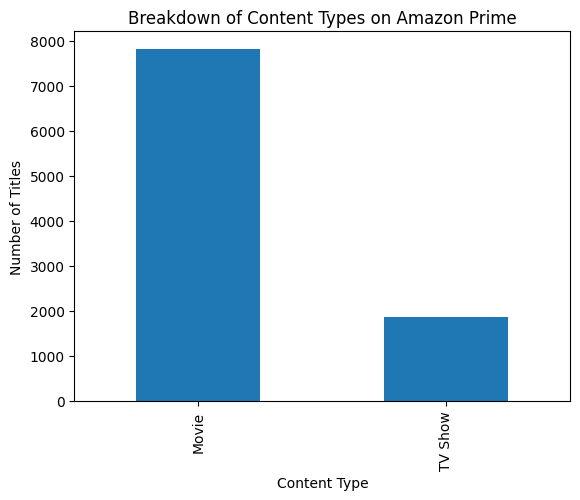

In [19]:
# Plot the content type breakdown
content_breakdown.plot(kind='bar')
plt.title('Breakdown of Content Types on Amazon Prime')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

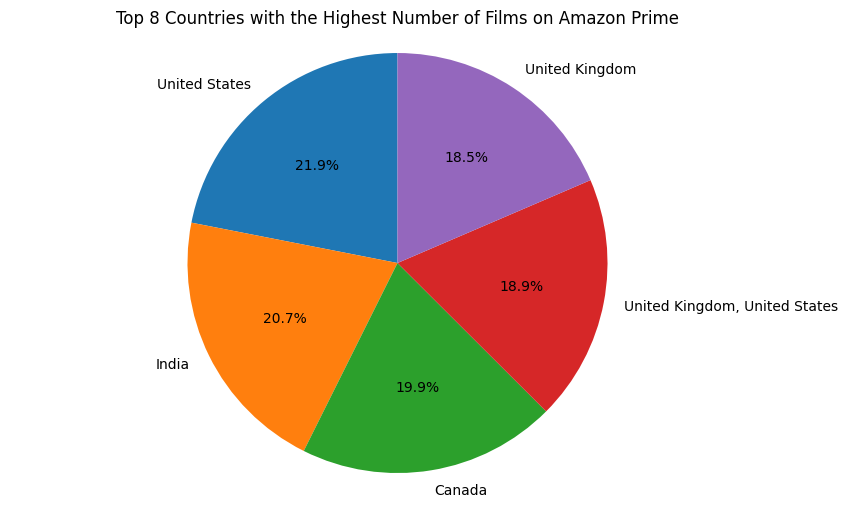

In [20]:
# Count movie occurrences by country
country_film_counts = data['country'].value_counts()
# Select the first 5 countries
top_countries = country_film_counts.head(5)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 8 Countries with the Highest Number of Films on Amazon Prime')
plt.axis('equal')  # Ensures the diagram is a perfect circle
plt.show()